In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import os
import seaborn as sns
import pandas as pd
sns.set()

C:\Users\pemami\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
save_dir = 'results'
scores_file = os.path.join(save_dir, 'scores.hdf5')
scores = h5py.File(scores_file, 'r')

ELBO = []
logGradVar = []
for sc in scores['scores']:
    ELBO.append(sc[0])
    logGradVar.append(sc[1])

tf_loggradvar = os.path.join(save_dir, 'TF-log-grad-var.csv')
tf_elbo = os.path.join(save_dir, 'TF-ELBO.csv')
df1 = pd.read_csv(tf_loggradvar)
df2 = pd.read_csv(tf_elbo)
df1 = df1.drop('Wall time', axis=1)
df2 = df2.drop('Wall time', axis=1)

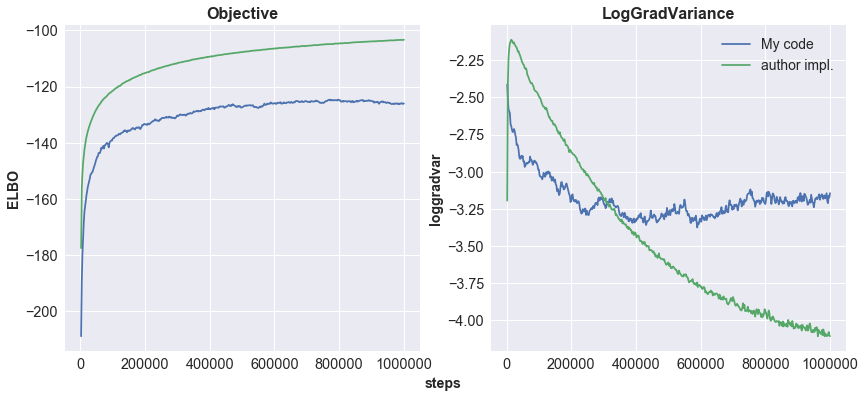

In [33]:
# plot ELBO
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(14,6))
ax1.plot(df2['Step'], ELBO[1:])
ax1.plot(df2['Step'], df2['Value'])
ax2.plot(df1['Step'], logGradVar[1:], label='My code')
ax2.plot(df1['Step'], df1['Value'], label='author impl.')
ax1.set_title('Objective', fontsize=16, fontweight='bold')
ax2.set_title('LogGradVariance', fontsize=16, fontweight='bold')
fig.text(0.5, 0.04, 'steps', ha='center', fontsize=14, fontweight='bold')
ax1.set_ylabel('ELBO', fontsize=14, fontweight='bold')
ax2.set_ylabel('loggradvar', fontsize=14, fontweight='bold')
ax1.tick_params(axis='both', labelsize='large')
ax2.tick_params(axis='both', labelsize='large')
plt.legend(fontsize=14)
plt.savefig('results.png')
plt.show()